In [1]:
# Average PILRs

In [2]:
!pwd
!date

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/FigureMorphingExt
Fri Apr 29 12:52:27 PDT 2022


In [3]:
import os
import sys
import importlib
import concurrent
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from skimage import io as skio
import matplotlib.pyplot as plt
from aicscytoparam import cytoparam
from aicsshparam import shtools, shparam
from aicsimageio import AICSImage, writers
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting
from cvapipe_analysis.steps.compute_features.compute_features_tools import FeatureCalculator
from vtk import util
sys.path.insert(1, '../tools')
import common

In [4]:
# Controller form cvapipe_analysis
path_config = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/")
control = controller.Controller(general.load_config_file(path_config))
device = io.LocalStagingIO(control)
print(control.get_staging())

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance


In [52]:
variables = control.get_variables_values_for_aggregation()
df = shapespace.ShapeSpaceBasic.get_aggregated_df(variables)
df = df.loc[df.structure.isin(["FBL", "LMNB1", "TOMM20", "ST6GAL1"])]
df = df.loc[df.mpId==control.get_center_map_point_index()]
df = df.loc[df.shape_mode==control.get_shape_modes()[0]]
df

,shape_mode,mpId,aggtype,alias,structure
100,NUC_MEM_PC1,5,avg,STR,FBL
105,NUC_MEM_PC1,5,avg,STR,LMNB1
111,NUC_MEM_PC1,5,avg,STR,TOMM20
113,NUC_MEM_PC1,5,avg,STR,ST6GAL1


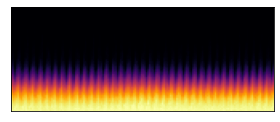

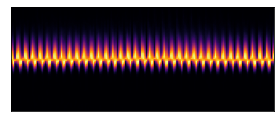

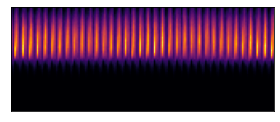

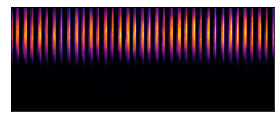

In [53]:
for index, row in df.iterrows():
    rep = device.read_agg_parameterized_intensity(row)
    fig, ax = plt.subplots(1,1, figsize=(4,2))
    ax.imshow(rep[:,::50], cmap="inferno", origin="lower")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    fname = f"FigureMorphingExt4_avg_rep_{row.structure}.png"
    plt.savefig(fname, dpi=150)
    plt.show()

In [54]:
variables = control.get_variables_values_for_aggregation()
variables.update({"shape_mode": ["NdSphere"], "mpId": [control.get_center_map_point_index()]})
space = shapespace.ShapeSpaceBasic(control)
df_agg = space.get_aggregated_df(variables).drop(columns=["structure"]).drop_duplicates().reset_index(drop=True)
row = df_agg.loc[0]
df_agg

,shape_mode,mpId,aggtype,alias
0,NdSphere,5,avg,STR


In [55]:
df_corr, _ = device.get_correlation_of_mean_reps(row)

In [56]:
for _, row1 in df.iterrows():
    for _, row2 in df.iterrows():
        print(row1.structure, row2.structure, df_corr.loc[row1.structure, row2.structure])

FBL FBL 1.0
FBL LMNB1 -0.3532315583238912
FBL TOMM20 -0.5850100070569083
FBL ST6GAL1 -0.3693515062199088
LMNB1 FBL -0.3532315583238912
LMNB1 LMNB1 1.0
LMNB1 TOMM20 0.2343636025671638
LMNB1 ST6GAL1 0.1265905547361962
TOMM20 FBL -0.5850100070569083
TOMM20 LMNB1 0.2343636025671638
TOMM20 TOMM20 1.0
TOMM20 ST6GAL1 0.5788034310881714
ST6GAL1 FBL -0.3693515062199088
ST6GAL1 LMNB1 0.1265905547361962
ST6GAL1 TOMM20 0.5788034310881714
ST6GAL1 ST6GAL1 1.0


In [57]:
common.now("complete")

complete 2022-04-29 15:33:44
